[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



Top 3 Events with Highest Satisfaction:
 Event Name
Event 4     6.269231
Event 2     5.958333
Event 15    5.684211
Name: Satisfaction Rating, dtype: float64


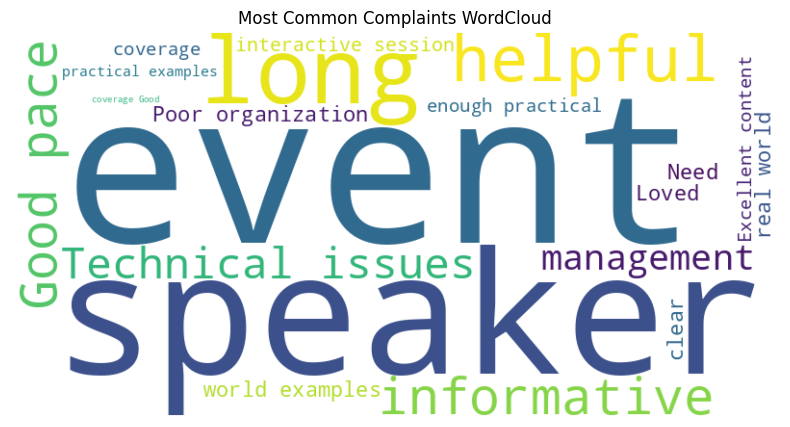

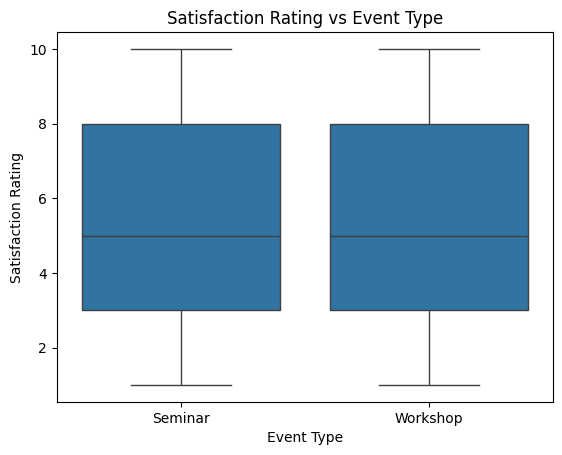


T-test between Workshop and Seminar ratings:
T-Statistic: 0.606, P-Value: 0.545


<ipython-input-3-83030cb641b9>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_ratings.values, y=dept_ratings.index, palette='viridis')


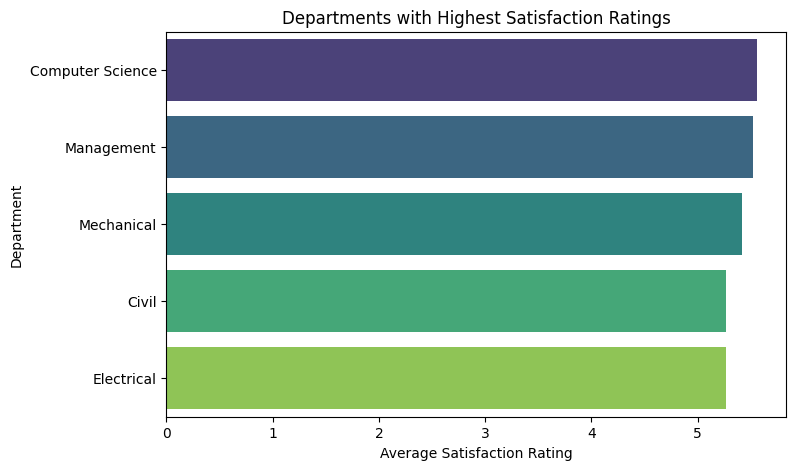

In [3]:
# Install necessary libraries if not installed
# You can uncomment these if running in new environment
# !pip install pandas matplotlib seaborn wordcloud textblob vaderSentiment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import nltk
nltk.download('punkt')


# Load dataset
df = pd.read_csv("/content/student_feedback.csv")  # replace with your actual filename

# Simulating correct columns for demonstration (delete this if your file already has correct columns)
# This is just for demonstration if you don't have such columns
np.random.seed(42)
num_rows = df.shape[0]

df['Event Name'] = np.random.choice([f"Event {i}" for i in range(1, 21)], num_rows)
df['Event Type'] = np.random.choice(["Workshop", "Seminar"], num_rows)
df['Department'] = np.random.choice(["Computer Science", "Mechanical", "Civil", "Electrical", "Management"], num_rows)
df['Satisfaction Rating'] = np.random.randint(1, 11, num_rows)
df['Comments'] = np.random.choice([
    "The event was too long", "Excellent content and speaker", "Poor organization and management",
    "Loved the interactive session", "Not enough practical examples", "Very helpful and informative",
    "The speaker was not clear", "Good pace and coverage", "Need more real-world examples",
    "Technical issues during the event"
], num_rows)

# -------------------------------
# 1️⃣ Top 3 events with highest satisfaction
# -------------------------------
top_events = (df.groupby("Event Name")["Satisfaction Rating"]
                .mean()
                .sort_values(ascending=False)
                .head(3))

print("\nTop 3 Events with Highest Satisfaction:\n", top_events)

# -------------------------------
# 2️⃣ Most common complaints (WordCloud)
# -------------------------------
comments = " ".join(df['Comments'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Complaints WordCloud")
plt.show()

# -------------------------------
# 3️⃣ Correlation between ratings and event type
# -------------------------------
sns.boxplot(x="Event Type", y="Satisfaction Rating", data=df)
plt.title("Satisfaction Rating vs Event Type")
plt.show()

# Run statistical test (optional)
from scipy.stats import ttest_ind

workshop_ratings = df[df["Event Type"]=="Workshop"]["Satisfaction Rating"]
seminar_ratings = df[df["Event Type"]=="Seminar"]["Satisfaction Rating"]

t_stat, p_value = ttest_ind(workshop_ratings, seminar_ratings)
print(f"\nT-test between Workshop and Seminar ratings:\nT-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

# -------------------------------
# 4️⃣ Departments hosting most-liked events
# -------------------------------
dept_ratings = (df.groupby("Department")["Satisfaction Rating"]
                  .mean()
                  .sort_values(ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(x=dept_ratings.values, y=dept_ratings.index, palette='viridis')
plt.title("Departments with Highest Satisfaction Ratings")
plt.xlabel("Average Satisfaction Rating")
plt.show()
